In [2]:
import matplotlib.pyplot as plt
from shapely import wkt
from shapely.geometry import Polygon
import contextily as ctx
import geopandas as gpd

In [25]:
# load geojson
file = 'Counties_and_Unitary_Authorities_May_2023_UK_BGC_-1930082272963792289.geojson'
gdf = gpd.read_file(file)
gdf

,FID,CTYUA23CD,CTYUA23NM,CTYUA23NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,1,E06000001,Hartlepool,,447160,531474,-1.27018,54.6761,3bf43124-f19b-410c-a4d7-fe936cd94d88,"MULTIPOLYGON (((-1.23001 54.62512, -1.22990 54..."
1,2,E06000002,Middlesbrough,,451141,516887,-1.21099,54.5447,f97de8d7-f645-4919-8499-eac4f1fa02e0,"MULTIPOLYGON (((-1.27712 54.54791, -1.27720 54..."
2,3,E06000003,Redcar and Cleveland,,464361,519597,-1.00608,54.5675,ef76d83c-4b2e-4415-8a89-7bbe66ad618f,"MULTIPOLYGON (((-1.20098 54.57763, -1.20037 54..."
3,4,E06000004,Stockton-on-Tees,,444940,518183,-1.30664,54.5569,05fc23f8-570f-46f2-b175-ce60859da82c,"MULTIPOLYGON (((-1.27493 54.55187, -1.27546 54..."
4,5,E06000005,Darlington,,428029,515648,-1.56835,54.5353,5a21326c-3c88-467d-82de-941423f4745e,"POLYGON ((-1.63800 54.61720, -1.63767 54.61670..."
...,...,...,...,...,...,...,...,...,...,...
213,214,W06000020,Torfaen,Torfaen,327459,200480,-3.05101,51.6984,58a387af-d642-4dc8-bc5f-440fcfbe9e93,"POLYGON ((-3.10597 51.79548, -3.09636 51.79155..."
214,215,W06000021,Monmouthshire,Sir Fynwy,337812,209231,-2.90280,51.7783,9c8be310-8a9e-4da1-8c70-f55583f5971f,"MULTIPOLYGON (((-2.78092 51.52605, -2.78124 51..."
215,216,W06000022,Newport,Casnewydd,337897,187432,-2.89769,51.5823,5be03efc-2644-4ac2-b173-65f554429f06,"MULTIPOLYGON (((-2.94235 51.62044, -2.94245 51..."
216,217,W06000023,Powys,Powys,302329,273255,-3.43531,52.3486,705b5a04-f071-45c7-86af-c5f8df8d373b,"MULTIPOLYGON (((-3.90623 52.56080, -3.90861 52..."


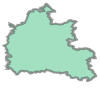

In [32]:
gdf[gdf["CTYUA23NM"]=="Oxfordshire"]['geometry'].values[0]

In [33]:
# Step 2: Create a Polygon object
polygon_oxford = gdf[gdf["CTYUA23NM"]=="Oxfordshire"]['geometry'].values[0]

In [34]:
# Step 3: Convert the Polygon to WKT format
# Step 4: Write the WKT string to a file
with open("oxfordshire.wkt", "w") as file:
    file.write(polygon_oxford.wkt)

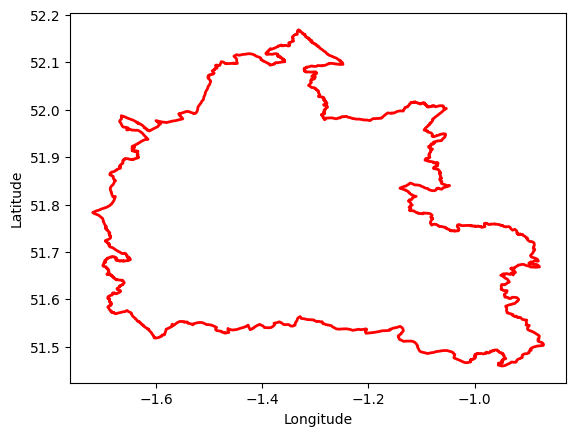

In [10]:
# Step 1: Load the WKT file
with open("oxfordshire.wkt", "r") as file:
    wkt_string = file.read()

# Step 2: Parse the WKT string to a Shapely geometry object
geometry = wkt.loads(wkt_string)

# Step 3: Plot the geometry
fig, ax = plt.subplots()
if isinstance(geometry, Polygon):
    x, y = geometry.exterior.xy
    ax.plot(x, y, color='red', linewidth=2)
else:
    # Handle other geometry types if needed
    x, y = geometry.xy
    ax.plot(x, y, color='blue', linewidth=2)

# Convert the geometry to a bounding box for contextily
# minx, miny, maxx, maxy = geometry.bounds
# ax.set_xlim(minx, maxx)
# ax.set_ylim(miny, maxy)

# Add the basemap with error handling
# ctx.add_basemap(ax, crs="EPSG:3857", source=ctx.providers.OpenStreetMap.Mapnik)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()